<a href="https://colab.research.google.com/github/Valerylu97/Machine_Learning/blob/main/Machine_Learning_Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn

In [2]:
!pip install -U scikit-learn

# Generating a random dataset

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=4)
#X: The generated samples
#y: The integer labels for clurter membership of each sample
#centers: The number of center to generate
print(X)
print(y)

[[ -4.74373113   8.26160045]
 [  4.12952868  -1.01964612]
 [  8.41612031   7.40692165]
 [ -6.15071972   9.34766988]
 [  8.60916621   6.19155484]
 [-11.09878391  -3.63862133]
 [ -9.67395804  -4.51049968]
 [  3.35721018  -1.55591429]
 [ -9.47136911  -3.21737275]
 [ -6.64000191   9.77664972]
 [ -4.67726493   6.44910386]
 [ -9.65556718  -2.50522786]
 [  3.35418423  -1.89908849]
 [  4.24839465   0.06714761]
 [ -3.89254253   7.99914163]
 [ -9.19686531  -4.84530591]
 [ -9.43211135  -3.80602679]
 [ 10.51537665   8.50240786]
 [  9.91583372   5.377437  ]
 [  8.32454632   4.91481117]
 [ -7.42951893   8.53867355]
 [ -7.52060923   7.45039465]
 [ -5.22645479   8.41641964]
 [  8.85650962   6.46615172]
 [-10.35406709  -4.766048  ]
 [  5.75064797  -1.28475266]
 [  9.5342233    6.19519618]
 [  2.45523095  -2.06482997]
 [-10.64450588  -2.89307812]
 [ -6.24824535   9.13188077]
 [ -9.29035981  -2.05327249]
 [  4.74377083  -1.9383749 ]
 [  1.43252152  -3.05483208]
 [  7.56712569   6.70125805]
 [  8.93624066

# Visualize the blobs

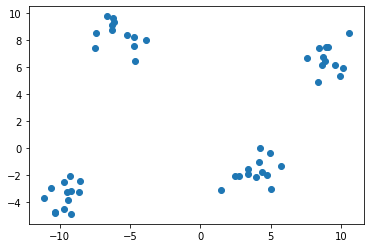

In [4]:
plt.scatter(X[:,0], X[:,1])

# Visualize the data set

In [5]:
linkage_method = 'average'
#complete
#single
#average
hac = AgglomerativeClustering(n_clusters=4,linkage=linkage_method).fit(X)

# Identify the clusters

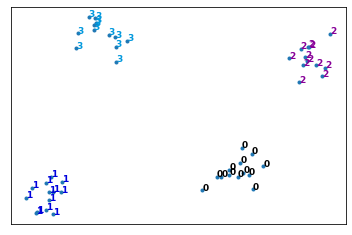

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

#Create a minimum and macimum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

#Get the averahe distance for X.
X = (X-x_min)/(x_max-x_min)

#This loop displays all of the datapoints.
for i in range(X.shape[0]):
  # Replace the data points with their respective cluster value
  # (ex. 0) and is color codded with a colormap (plt.cm.spectral)
  plt.text(X[i,0],X[i,1], str(y[i]),
           color=plt.cm.nipy_spectral(hac.labels_[i] / 10.),
           fontdict={'weight':'bold','size':9})


#Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

#Display the plot of the original data before clustering
plt.scatter(X[:,0], X[:,1], marker='.')
#Display the plot
plt.show()

# Calculate the distance matrix

In [7]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 0.7559358 , 0.61165256, ..., 0.80436987, 0.04704908,
        0.80783009],
       [0.7559358 , 0.        , 0.60946589, ..., 0.60829618, 0.716695  ,
        0.63320407],
       [0.61165256, 0.60946589, 0.        , ..., 1.07125307, 0.60862664,
        1.08885481],
       ...,
       [0.80436987, 0.60829618, 1.07125307, ..., 0.        , 0.75865459,
        0.0265236 ],
       [0.04704908, 0.716695  , 0.60862664, ..., 0.75865459, 0.        ,
        0.76251366],
       [0.80783009, 0.63320407, 1.08885481, ..., 0.0265236 , 0.76251366,
        0.        ]])

# Question 1
### What is the structure of this matrix?

**Answer:**

The distance matrix is a symmetric matrix with zeros in its diagonal, this matrix is composed by the distances between points, where we have the same points for the rows as for the columns. For this reason the diagonal has a distance of zero since the distance from the point to the same point is zero.

# Visualize and discuss the dendrogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


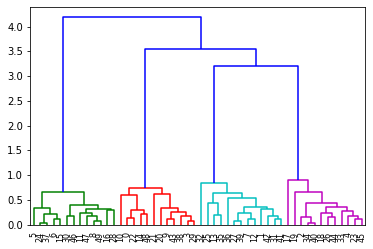

In [8]:
Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendro = hierarchy.dendrogram(Z)

# Question 2
### How many clusters can you identify in the dendrogram, is it easy to see?

**Answer:**
If we cut the dendrogram in the level 4, we have a 2 clusters, it is easy to see.
However, If we cut the dendrogram in the level 1 we have 4 clusters  

# Question 3
### Explain the organization of the clusters?

**Answer:**

Clusters are organized by relating distances between points and if we visualize the dendrogram and cut it into different levels we take each connected component as clusters.

# Question 4
### Use the complete, single, and average method, do you see any difference between them? Discuss your answer

### Single

In [9]:
linkage_method = 'single'
#complete
#single
#average
hac = AgglomerativeClustering(n_clusters=4,linkage=linkage_method).fit(X)

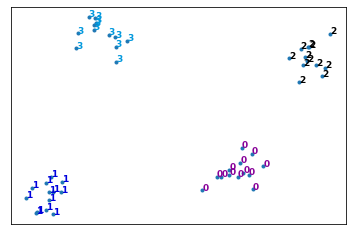

In [10]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

#Create a minimum and macimum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

#Get the averahe distance for X.
X = (X-x_min)/(x_max-x_min)

#This loop displays all of the datapoints.
for i in range(X.shape[0]):
  # Replace the data points with their respective cluster value
  # (ex. 0) and is color codded with a colormap (plt.cm.spectral)
  plt.text(X[i,0],X[i,1], str(y[i]),
           color=plt.cm.nipy_spectral(hac.labels_[i] / 10.),
           fontdict={'weight':'bold','size':9})


#Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

#Display the plot of the original data before clustering
plt.scatter(X[:,0], X[:,1], marker='.')
#Display the plot
plt.show()

In [11]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 0.7559358 , 0.61165256, ..., 0.80436987, 0.04704908,
        0.80783009],
       [0.7559358 , 0.        , 0.60946589, ..., 0.60829618, 0.716695  ,
        0.63320407],
       [0.61165256, 0.60946589, 0.        , ..., 1.07125307, 0.60862664,
        1.08885481],
       ...,
       [0.80436987, 0.60829618, 1.07125307, ..., 0.        , 0.75865459,
        0.0265236 ],
       [0.04704908, 0.716695  , 0.60862664, ..., 0.75865459, 0.        ,
        0.76251366],
       [0.80783009, 0.63320407, 1.08885481, ..., 0.0265236 , 0.76251366,
        0.        ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


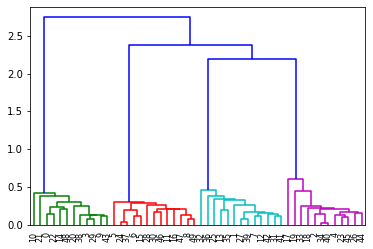

In [12]:
Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendro = hierarchy.dendrogram(Z)

### Complete

In [13]:
linkage_method = 'complete'
#complete
#single
#average
hac = AgglomerativeClustering(n_clusters=4,linkage=linkage_method).fit(X)

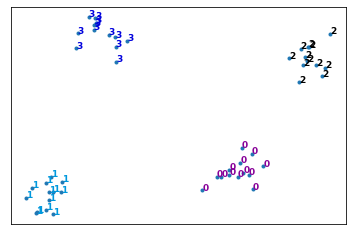

In [14]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

#Create a minimum and macimum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

#Get the averahe distance for X.
X = (X-x_min)/(x_max-x_min)

#This loop displays all of the datapoints.
for i in range(X.shape[0]):
  # Replace the data points with their respective cluster value
  # (ex. 0) and is color codded with a colormap (plt.cm.spectral)
  plt.text(X[i,0],X[i,1], str(y[i]),
           color=plt.cm.nipy_spectral(hac.labels_[i] / 10.),
           fontdict={'weight':'bold','size':9})


#Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

#Display the plot of the original data before clustering
plt.scatter(X[:,0], X[:,1], marker='.')
#Display the plot
plt.show()

In [15]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 0.7559358 , 0.61165256, ..., 0.80436987, 0.04704908,
        0.80783009],
       [0.7559358 , 0.        , 0.60946589, ..., 0.60829618, 0.716695  ,
        0.63320407],
       [0.61165256, 0.60946589, 0.        , ..., 1.07125307, 0.60862664,
        1.08885481],
       ...,
       [0.80436987, 0.60829618, 1.07125307, ..., 0.        , 0.75865459,
        0.0265236 ],
       [0.04704908, 0.716695  , 0.60862664, ..., 0.75865459, 0.        ,
        0.76251366],
       [0.80783009, 0.63320407, 1.08885481, ..., 0.0265236 , 0.76251366,
        0.        ]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


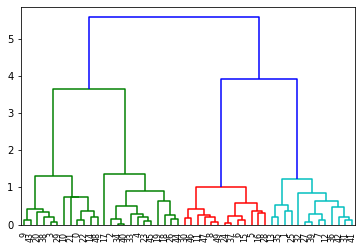

In [16]:
Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendro = hierarchy.dendrogram(Z)

**Answer:**

As we can see, by changing the link type there are some changes. However these changes can only be visualized in the dendrogram. Where the distances for the 'single' linkage are much shorter compared to the 'complete' and 'average' linkage. But between the 'average' and 'complete' linkage the distances also undergo changes, e.g. the distances for the 'complete' linkage are larger up to level 5, while for the 'average' linkage they are just above level 4.
